In [362]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [364]:
#Read the csv file
df = pd.read_csv('My Uber Drives - 2016.csv')
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [368]:
#Know the dataypes
print(df.shape)
df.dtypes

(1156, 7)


START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [370]:
#Any null values
df.isna().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [372]:
#where is the end date null
df[df['END_DATE*'].isna()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [374]:
#Remove the particular row
df.drop(1155,inplace = True)

In [382]:
#Again check any null values
#replacing missing values with PURPOSE* equals to "other"
df['PURPOSE*'].replace(np.nan, 'Other', inplace=True)
df.isna().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     1155 non-null   object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [386]:
#Any duplicate values
df[df.duplicated()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9,Meeting


In [388]:
#Remove the duplicates
df.drop(492,inplace = True)

**Converting start_date and end_date cols into datetime**

In [391]:
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'], format='%m/%d/%Y %H:%M')

In [393]:
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'], format='%m/%d/%Y %H:%M')
df.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

## Exploratory Data Analysis ##

In [396]:
df['CATEGORY*'].unique()

array(['Business', 'Personal'], dtype=object)

There are two categories : Business and Personal

In [399]:
df[['CATEGORY*', 'MILES*']].groupby(['CATEGORY*']).sum().rename(columns={'MILES*':'total miles'})

,total miles
CATEGORY*,
Business,11477.1
Personal,717.7


<Axes: xlabel='CATEGORY*'>

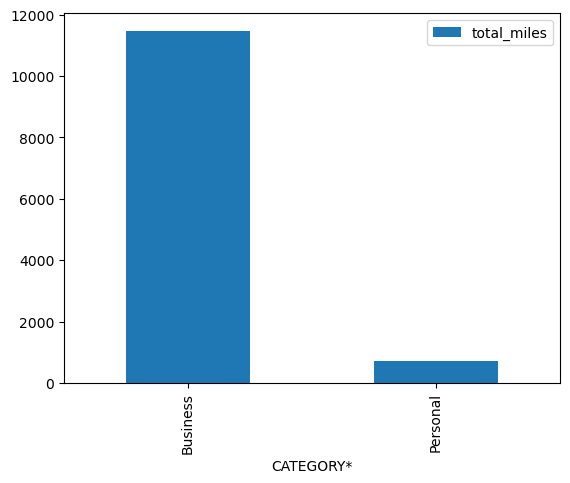

In [401]:
df[['CATEGORY*', 'MILES*']].groupby(['CATEGORY*']).agg(total_miles = ('MILES*','sum')).plot.bar()

In [403]:
print(11477.1/(11477.1+717.7))
print(717.1/(11477.1+717.7))

0.9411470462820218
0.05880375241906386


- It shows that around 94% uses the uber cab for business trips 
- only 6% uses it for personal trips

In [406]:
len(df['START*'].unique())

177

There are around 177 unique start points

## Top 10 Starting Locations ##

In [410]:
df['START*'].value_counts().head(15)

START*
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Lahore               36
Durham               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Apex                 17
Berkeley             16
Midtown              14
Kenner               11
Kissimmee            11
Name: count, dtype: int64

<Axes: title={'center': 'Top 10 pickup locations'}, xlabel='Count', ylabel='LOCATIONS'>

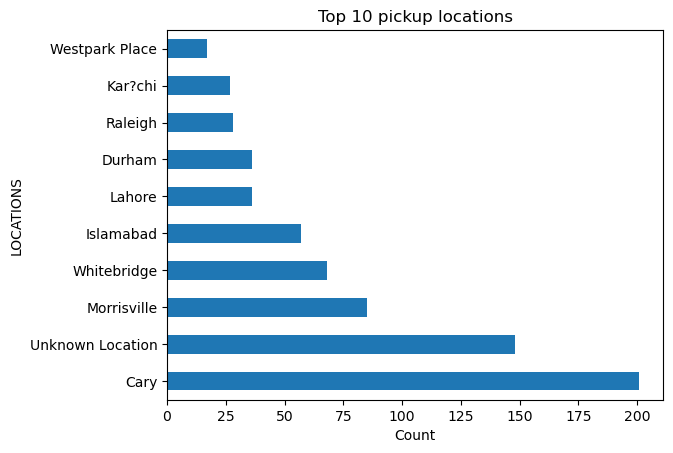

In [496]:
df['START*'].value_counts().head(10).plot.barh(ylabel= 'LOCATIONS',xlabel = 'Count', title= 'Top 10 pickup locations')


 **Cary is the most popular starting point**

## Top 10 Dropping locations ##

In [416]:
df['STOP*'].value_counts().head(10)

STOP*
Cary                202
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Name: count, dtype: int64

<Axes: title={'center': 'Top 10 dropping locations'}, xlabel='Count', ylabel='LOCATIONS'>

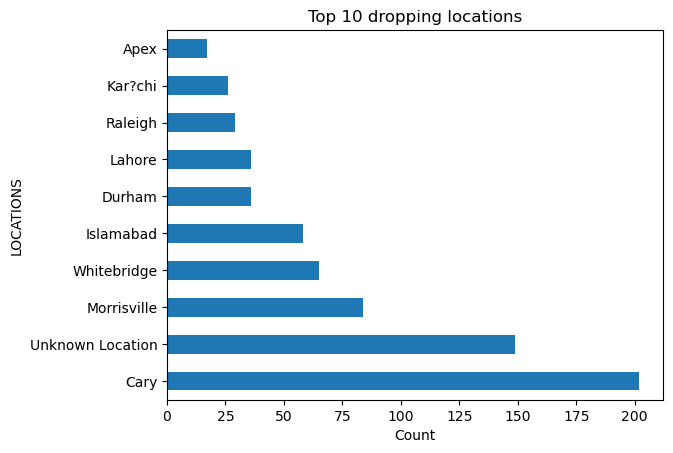

In [418]:
df['STOP*'].value_counts().head(10).plot.barh(ylabel= 'LOCATIONS',xlabel = 'Count', title= 'Top 10 dropping locations')


 **Cary is the most popular dropping point**
 
 **May be the user's home is in Cary**

### Adding hours, day, month, weekday ###

In [422]:
hour = []
day = []
month = []
weekday = []
dayofweek = []
for i in df['START_DATE*']:
    hour.append(i.hour)
    month.append(i.month)
    day.append(i.day)
    dayofweek.append(i.day_of_week)
    weekday.append(calendar.day_name[dayofweek[-1]])
df['HOUR'] = hour
df['MONTH']=month
df['DAY']=day
df['DAYOFWEEK']=dayofweek
df['WEEKDAY']=weekday

In [424]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,MONTH,DAY,DAYOFWEEK,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,4,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Other,1,1,2,5,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,1,2,5,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,1,5,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,1,6,2,Wednesday


## Which day the user travels more?

In [427]:
df['WEEKDAY'].value_counts()

WEEKDAY
Friday       206
Tuesday      175
Monday       174
Thursday     154
Saturday     150
Sunday       148
Wednesday    147
Name: count, dtype: int64

<Axes: title={'center': 'No of trips in Weekdays'}, xlabel='WEEKDAY', ylabel='TRIPS'>

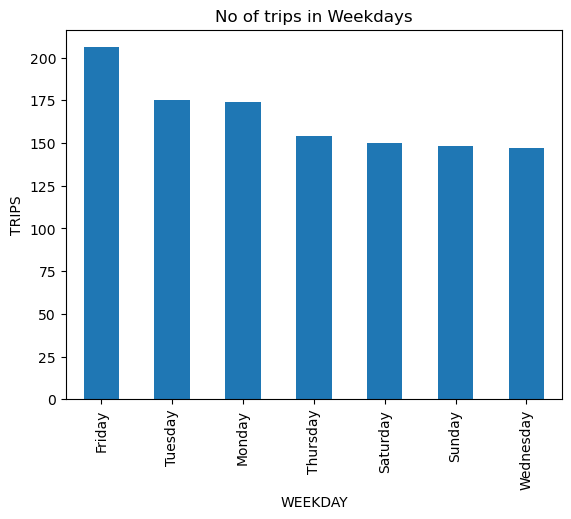

In [429]:
df['WEEKDAY'].value_counts().plot.bar(ylabel= 'TRIPS',title = 'No of trips in Weekdays')

**On Friday the user travels more**

## Which hour travels more 

In [433]:
df['HOUR'].value_counts()

HOUR
15    98
17    95
13    94
18    94
14    89
16    88
12    77
11    72
20    71
19    68
10    65
9     51
21    51
8     35
22    31
23    25
0     19
7     13
1      5
5      4
6      4
3      3
2      2
Name: count, dtype: int64

<Axes: title={'center': 'TRIPS VS HOUR'}, xlabel='HOUR', ylabel='TRIPS'>

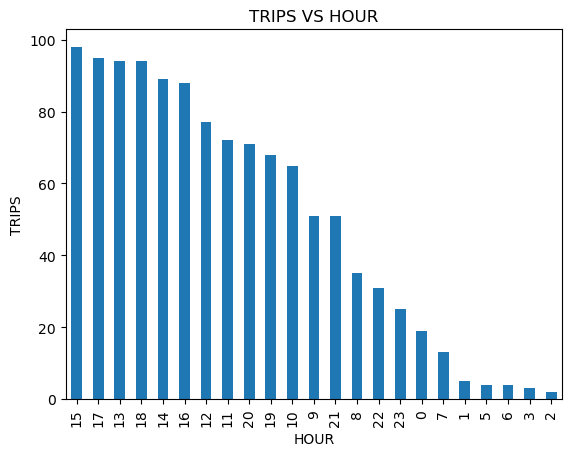

In [435]:
df['HOUR'].value_counts().plot.bar(ylabel = 'TRIPS', title = 'TRIPS VS HOUR')

**At 15:00 user takes frequent trips**

## Purpose of trips

In [439]:
df['PURPOSE*'].value_counts()

PURPOSE*
Other              502
Meeting            186
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: count, dtype: int64

<Axes: ylabel='PURPOSE*'>

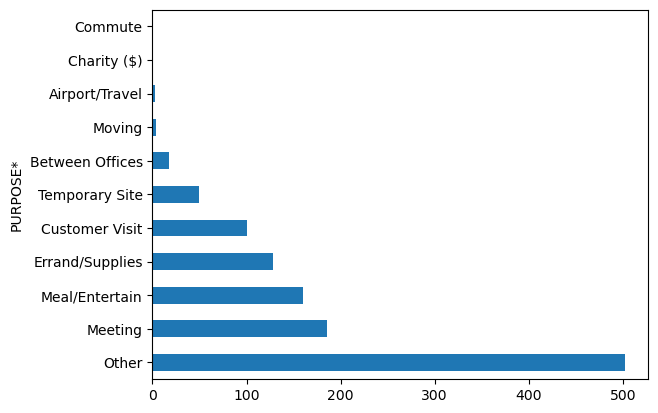

In [441]:
df['PURPOSE*'].value_counts().plot.barh()

## No of trips per each day

In [444]:
df['DAY'].value_counts()

DAY
19    67
29    51
27    51
26    45
22    45
21    45
12    44
1     43
16    42
18    38
20    38
13    37
11    37
8     37
28    35
10    35
25    35
7     34
23    34
6     33
14    33
4     33
5     33
3     33
17    33
30    32
2     30
24    29
9     29
15    28
31    15
Name: count, dtype: int64

<Axes: title={'center': 'No of TRIPS vs DAY'}, xlabel='DAY', ylabel='TRIPS'>

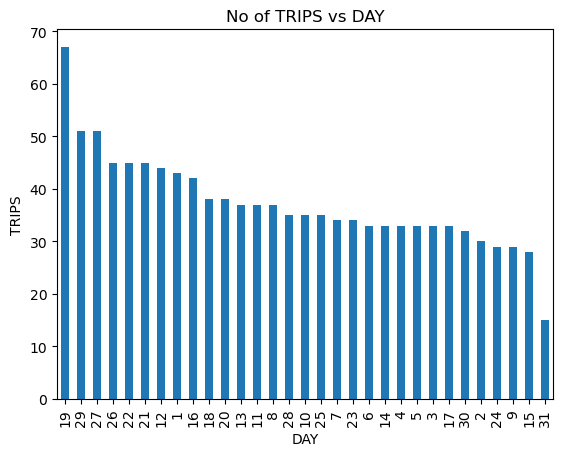

In [449]:
df['DAY'].value_counts().plot.bar(ylabel = 'TRIPS', title= 'No of TRIPS vs DAY')

**On 19th the user takes more number of trips**

## No of trips in a month

In [460]:
df['MONTH'].value_counts()

MONTH
12    146
8     133
11    122
2     115
3     113
7     112
6     107
10    106
1      61
4      54
5      49
9      36
Name: count, dtype: int64

<Axes: title={'center': 'No of TRIPS vs MONTH'}, xlabel='MONTH', ylabel='TRIPS'>

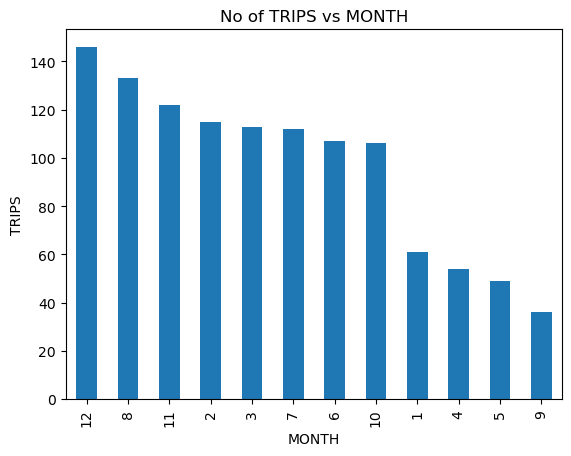

In [453]:
df['MONTH'].value_counts().plot.bar(ylabel = 'TRIPS', title= 'No of TRIPS vs MONTH')

**On December the user takes more number of trips**

## Checking for Round trip

In [487]:
def is_roundtrip(df):
    if df['START*'] == df['STOP*']:
        return 'yes'
    else:
        return 'No'
df['ROUND_TRIP*'] = df.apply(is_roundtrip, axis = 1)


In [489]:
df['ROUND_TRIP*'].value_counts()


ROUND_TRIP*
No     866
yes    288
Name: count, dtype: int64

<Axes: xlabel='ROUND_TRIP*', ylabel='count'>

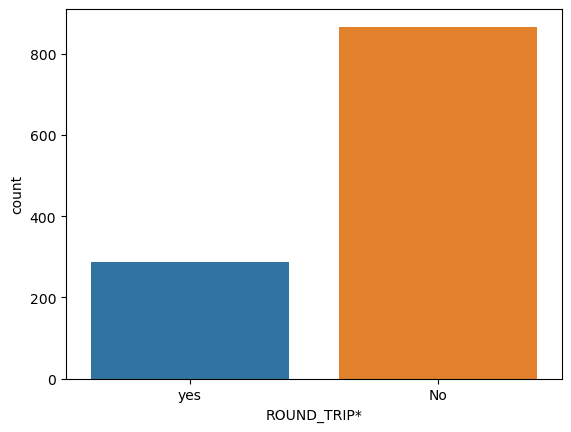

In [493]:
sns.countplot(x='ROUND_TRIP*',data = df)


<Axes: xlabel='DAY', ylabel='Density'>

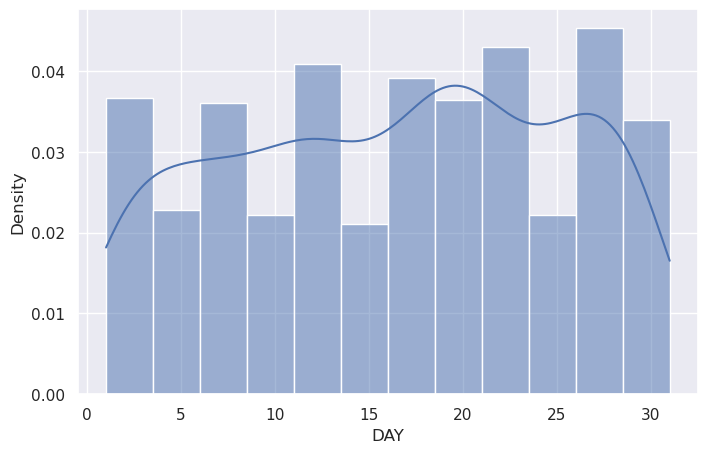

In [542]:
sns.set(rc={'figure.figsize':(8,5)})
sns.histplot(df["DAY"],kde = True,stat="density")

In [ ]:
sns.histplot(df["DAY"],kde = True,stat="density")